<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/Machine_learning_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример обработки данных в машинном обучении

## Установка зависимостей

Pip - менеджер пакетов python. Глобально, все пакеты лежат в pypi - глоабльный репозиторий пакетов python.

[Посмотреть](https://www.youtube.com/watch?v=rsG1Y5k-9jo)

In [195]:
# директива !pip - установка зависимостей
# пример поиска https://pypi.org/project/scikit-learn/
# чаще всего в examples библиотек указан способ установки https://scikit-learn.org/stable/install.html
!pip install scikit-learn
!pip install seaborn
!pip install umap-learn
!pip install pandas

## Настройка датасета

In [196]:
from sklearn.datasets import load_diabetes # в sklearn существует дефолтные датасеты, возьмем его для нашего исследования

data = load_diabetes(as_frame=True, scaled=False) # as_frame - возращает как dataframe, scaled - автоматическое масштабирование. Отключаем все.
X = data.data # X - в ML называют так обычно исследуемые переменные (те переменные, влияние которых мы исследуем на целевую переменную y)
y = data.target # y - целевая переменная

### Датасет о диабете
-------------------

Для каждого из n = 442 пациентов с диабетом были получены десять базовых переменных: возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений содержания сыворотки крови, а также интересующий нас показатель - количественная мера прогрессирования заболевания через год после начальной диагностики.

**Характеристики датасета:**

- Количество экземпляров: 442
- Количество признаков: Первые 10 столбцов содержат числовые прогностические значения
- Цель (Target): Столбец 11 представляет собой количественную меру прогрессирования заболевания через год после начальной диагностики

**Информация о признаках:**
- `age`: возраст в годах
- `sex`: пол
- `bmi`: индекс массы тела
- `bp`: среднее артериальное давление
- `s1`: tc, общий холестерин в сыворотке
- `s2`: ldl, липопротеины низкой плотности (LDL)
- `s3`: hdl, липопротеины высокой плотности (HDL)
- `s4`: tch, общий холестерин / HDL
- `s5`: ltg, возможно, логарифм уровня триглицеридов в сыворотке
- `s6`: glu, уровень сахара в крови

**Источник URL:** [https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

**Дополнительная информация:** Bradley Efron, Trevor Hastie, Iain Johnstone и Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499. ([Ссылка на статью](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf))

## Описательная статистика и первичный анализ

In [197]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.c_[data.data, data.target],
                            columns=data.feature_names + ['target'])
# np.c_() - добавляем новый столбец в матрицу и засовываем все это в pandas
df.sex = df.sex.astype('category')

In [198]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     442 non-null    float64 
 1   sex     442 non-null    category
 2   bmi     442 non-null    float64 
 3   bp      442 non-null    float64 
 4   s1      442 non-null    float64 
 5   s2      442 non-null    float64 
 6   s3      442 non-null    float64 
 7   s4      442 non-null    float64 
 8   s5      442 non-null    float64 
 9   s6      442 non-null    float64 
 10  target  442 non-null    float64 
dtypes: category(1), float64(10)
memory usage: 35.2 KB


In [200]:
df.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [201]:
df.corr() # коореляция пирсона между всеми числовыми переменными

<ipython-input-201-7ba50e18bd91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # коореляция пирсона между всеми числовыми переменными


,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
target,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


In [202]:
# Корреляция между переменными и целевой переменной (Y)
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False) # получаем матрицу относительно стобца target - нашей целевой переменной
correlation_with_target

<ipython-input-202-66ea982c8130>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
s3       -0.394789
Name: target, dtype: float64

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Переменные')

Text(0, 0.5, 'Корреляция с целевой переменной (Y)')

Text(0.5, 1.0, 'Корреляция между переменными и целевой переменной')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'target'),
  Text(1, 0, 'bmi'),
  Text(2, 0, 's5'),
  Text(3, 0, 'bp'),
  Text(4, 0, 's4'),
  Text(5, 0, 's6'),
  Text(6, 0, 's1'),
  Text(7, 0, 'age'),
  Text(8, 0, 's2'),
  Text(9, 0, 's3')])

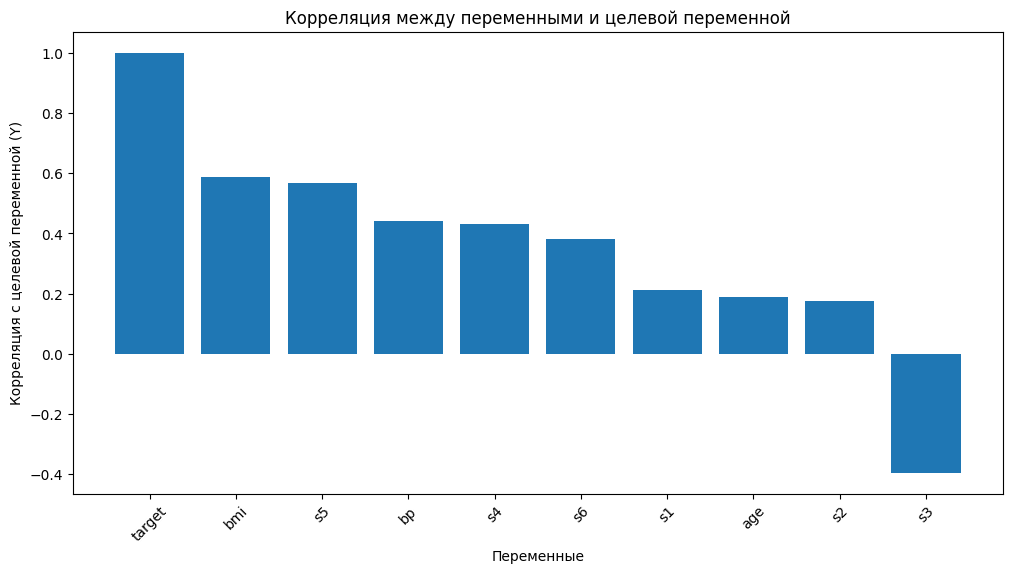

In [203]:
import matplotlib.pyplot as plt

# Визуализация корреляции
plt.figure(figsize=(12, 6))
plt.bar(correlation_with_target.index, correlation_with_target)
plt.xlabel('Переменные')
plt.ylabel('Корреляция с целевой переменной (Y)')
plt.title('Корреляция между переменными и целевой переменной')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='age', ylabel='target'>

Text(0.5, 0, 'age')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'age vs. target')

<Axes: xlabel='bmi', ylabel='target'>

Text(0.5, 0, 'bmi')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'bmi vs. target')

<Axes: xlabel='bp', ylabel='target'>

Text(0.5, 0, 'bp')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'bp vs. target')

<Axes: xlabel='s1', ylabel='target'>

Text(0.5, 0, 's1')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 's1 vs. target')

<Axes: xlabel='s2', ylabel='target'>

Text(0.5, 0, 's2')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 's2 vs. target')

<Axes: xlabel='s3', ylabel='target'>

Text(0.5, 0, 's3')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 's3 vs. target')

<Axes: xlabel='s4', ylabel='target'>

Text(0.5, 0, 's4')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 's4 vs. target')

<Axes: xlabel='s5', ylabel='target'>

Text(0.5, 0, 's5')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 's5 vs. target')

<Axes: xlabel='s6', ylabel='target'>

Text(0.5, 0, 's6')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 's6 vs. target')

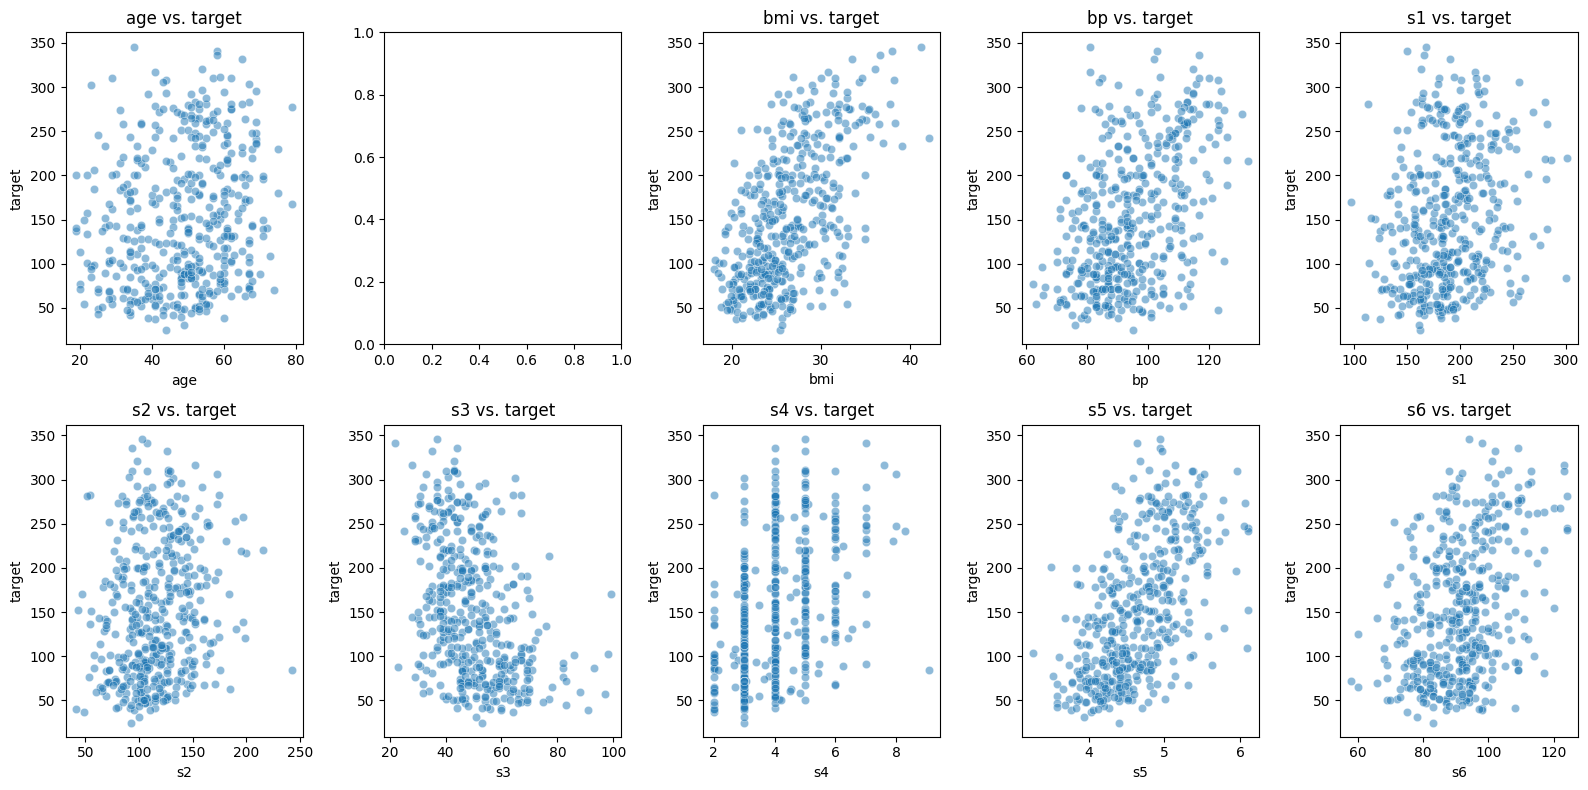

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

CATEGORY = 'category'

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

columns = list(df.columns) # создаем список колонок

for i, ax in enumerate(axes.flatten()):
    if df[columns[i]].dtype == CATEGORY:
        continue
    sns.scatterplot(data=df, x=columns[i], y='target', alpha=0.5, ax=ax) # стоим диаграммы рассеивания
    ax.set_xlabel(columns[i])
    ax.set_ylabel('target')
    ax.set_title(f'{columns[i]} vs. target')

plt.tight_layout()
plt.show()

На графиках рассеивания, можно заметить как признаки коррелируют друг с другом, также можно поискать выбросы (Например S2 vs. target, точка ~ (250, 80) X,Y соответсвующий - похожа на выброс)

## Поиск выбросов и аномалий

In [206]:
def find_outliers_two_means(data, k=2.5):
    """
    Поиск выбросов в данных с использованием правила двух средних.

    Если value >= mean + 2.5 * std or value <= mean - 2.5 * std, то считаем выбросом

    Параметры:
    - data: массив данных
    - k: множитель стандартного отклонения (по умолчанию 2)

    Возвращает:
    - outliers: массив, содержащий выwбросы
    """
    mean = np.mean(data)
    std_dev = np.std(data)
    lower_threshold = mean - k * std_dev
    upper_threshold = mean + k * std_dev
    outliers = data[(data < lower_threshold) | (data > upper_threshold)]
    return outliers

outlier_indexes = set()
for col in df.select_dtypes(include=['float64']).columns:
  outlieres = find_outliers_two_means(df[col])
  index = outlieres.index
  print(f'Column: {col}, outlieres: {outlieres.to_numpy()}, index: {index}')

  for item in index:
      outlier_indexes.add(item)

df_no_outlier = df.copy()
df_no_outlier.drop(list(outlier_indexes), inplace=True)

Column: age, outlieres: [], index: Int64Index([], dtype='int64')
Column: bmi, outlieres: [38.  38.3 41.3 38.2 39.1 42.2 37.8], index: Int64Index([32, 145, 256, 262, 366, 367, 405], dtype='int64')
Column: bp, outlieres: [131. 133.], index: Int64Index([71, 340], dtype='int64')
Column: s1, outlieres: [ 97. 300. 286. 281. 301. 282. 280. 280. 282. 276.], index: Int64Index([76, 123, 161, 202, 230, 248, 276, 287, 346, 376], dtype='int64')
Column: s2, outlieres: [242.4 199.4 215.  197.2 195.4 196.8 198.6], index: Int64Index([123, 161, 230, 248, 287, 346, 376], dtype='int64')
Column: s3, outlieres: [86. 99. 91. 98. 83. 93. 88. 83. 97.], index: Int64Index([35, 58, 260, 261, 266, 269, 286, 433, 441], dtype='int64')
Column: s4, outlieres: [9.09 7.6  8.   7.9  8.28 8.  ], index: Int64Index([123, 141, 216, 321, 322, 336], dtype='int64')
Column: s5, outlieres: [6.107  3.2581 6.107  5.9584 6.1048 6.0568 6.0936 5.9506 6.0684], index: Int64Index([23, 110, 169, 254, 322, 323, 353, 371, 394], dtype='int64

In [207]:
df.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [208]:
df_no_outlier.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,48.329082,26.069643,93.854541,185.803571,114.049745,49.610969,3.963367,4.593432,90.464286,146.267857
std,13.349765,4.084713,13.120501,31.371867,28.037131,11.469734,1.133788,0.474077,10.519681,73.510319
min,19.000000,18.000000,62.000000,110.000000,41.600000,23.000000,2.000000,3.496500,66.000000,25.000000
25%,38.000000,23.100000,84.000000,163.000000,96.150000,41.000000,3.000000,4.259150,83.000000,85.000000
50%,50.000000,25.600000,93.000000,184.500000,113.000000,48.000000,4.000000,4.564300,91.000000,135.000000
75%,59.000000,28.700000,103.000000,205.000000,132.050000,57.000000,5.000000,4.934500,97.000000,200.000000
max,79.000000,37.000000,126.000000,269.000000,190.200000,82.000000,7.000000,5.808100,117.000000,336.000000


## Подбор фичей (признаков) для дальнейшего анализа

Если кратко, cуществует два основных типа статистических гипотез: нулевая гипотеза (H0) и альтернативная гипотеза (H1).

**Нулевая гипотеза (H0)**: Нулевая гипотеза формулируется с предположением, что нет статистически значимых различий (закономерности нет - все случайно 😏), эффектов или связей в данных. Это предположение, которое нужно будет проверить статистически.

**Альтернативная гипотеза (H1)**: Альтернативная гипотеза, наоборот, формулируется с предположением о наличии статистически значимых различий, эффектов или связей в данных (случайности не случайны 🤯).

Выбор (не опровержение гипотезы) зависит от магического P-value и F-statistic (попробуем на лекции рассмотреть пример более подрбный - сейчас кратко).

**P-значение (уровень значимости)** - это вероятность получить такие или более экстремальные результаты, если бы нулевая гипотеза была верна.

Как выбрать гипотезу:

Если P-значение меньше заданного уровня значимости (обычно 0,05), то можно отвергнуть нулевую гипотезу в пользу альтернативной гипотезы. Это означает, что есть статистически значимые различия, эффекты или связи в данных.

Если P-значение больше уровня значимости, то нулевая гипотеза не может быть отвергнута, и данные не содержат статистически значимых различий или эффектов.

В задачах машинного обучения, таких как поиска фич (признаков, колонок), которые предположительно влияют на результат целевой переменной - выбирается относительно НЕ опровержнеия H1.

**[Посмотреть](https://www.youtube.com/watch?v=6H_r8gTnAu8)**

**[Почитать](https://www.questionstar.ru/uchebnik-kak-provodit-oprosy/analiz-dannix-statisticheskie-metodi/induktivnaya-statistika/proverka-statisticheskix-gipotez)**

In [209]:
from scipy import stats

# Функция для вычисления p-значения корреляции Пирсона и Спирмена
def perform_tests_by_numeric(data, target):
    pearson_corr, pearson_pvalue = stats.pearsonr(data, target)
    spearman_corr, spearman_pvalue = stats.spearmanr(data, target)
    return pearson_corr, pearson_pvalue, spearman_corr, spearman_pvalue

# Функция для выполнения t-теста и теста Манна-Уитни
def perform_tests_by_category(data, target):
    # Получение уникальных значений в столбце data
    unique_values = data.unique()

    # Разделение данных на две выборки: одна с уникальными значениями слева, другая с уникальными значениями справа
    left_data = target[df[column] == unique_values[0]]
    right_data = target[df[column] == unique_values[1]]

    # Проверка на нормальность
    _, normality_pvalue = stats.shapiro(target)

    if normality_pvalue > 0.05:
        # Данные распределены нормально, используем t-тест
        t_stat, t_pvalue = stats.ttest_ind(left_data, right_data)
        mannwhitney_stat, mannwhitney_pvalue = None, None
    else:
        # Данные не распределены нормально, используем тест Манна-Уитни
        t_stat, t_pvalue = None, None
        mannwhitney_stat, mannwhitney_pvalue = stats.mannwhitneyu(left_data, right_data)

    return normality_pvalue, t_stat, t_pvalue, mannwhitney_stat, mannwhitney_pvalue


# Инициализация списков для хранения результатов
significant_features = []  # Значимые переменные

# Выполнение статистических тестов для каждой переменной
for column in df.columns[:-1]:  # Исключаем последний столбец (целевую переменную)
    dtype = df[column].dtype
    target = df['target']

    if dtype == 'float64':
        # Числовая переменная
        pearson_corr, pearson_pvalue, spearman_corr, spearman_pvalue = perform_tests_by_numeric(df[column], target)
        if pearson_pvalue < 0.05:
            print(f"Pearson корреляция для {column}: p-value = {pearson_pvalue}")
        if spearman_pvalue < 0.05:
            print(f"Spearman корреляция для {column}: p-value = {spearman_pvalue}\n")
        if pearson_pvalue < 0.05 or spearman_pvalue < 0.05:
            significant_features.append(column)
    elif dtype == 'category':
        # Категориальная переменная (0 и 1)
        normality_pvalue, t_stat, t_pvalue, mannwhitney_stat, mannwhitney_pvalue = perform_tests_by_category(df[column], target)
        print(f"Тест для {column}: p-value = {t_pvalue if t_pvalue is not None else mannwhitney_pvalue} \n")
        if (t_pvalue is not None and t_pvalue < 0.05) or (mannwhitney_pvalue is not None and mannwhitney_pvalue < 0.05):
          significant_features.append(column)

Pearson корреляция для age: p-value = 7.055686149116364e-05
Spearman корреляция для age: p-value = 2.8061321217515732e-05

Тест для sex: p-value = 0.432427773770497 

Pearson корреляция для bmi: p-value = 3.466006445167151e-42
Spearman корреляция для bmi: p-value = 4.567023927725032e-38

Pearson корреляция для bp: p-value = 1.6493720527427366e-22
Spearman корреляция для bp: p-value = 5.992783653793123e-20

Pearson корреляция для s1: p-value = 6.9207117877603935e-06
Spearman корреляция для s1: p-value = 7.791070367909495e-07

Pearson корреляция для s2: p-value = 0.00023598480959854482
Spearman корреляция для s2: p-value = 3.3872554689853826e-05

Pearson корреляция для s3: p-value = 6.162864695185101e-18
Spearman корреляция для s3: p-value = 2.3770565825526634e-19

Pearson корреляция для s4: p-value = 2.3042532817540745e-21
Spearman корреляция для s4: p-value = 2.6290393847228478e-23

Pearson корреляция для s5: p-value = 8.826458958880616e-39
Spearman корреляция для s5: p-value = 1.06782

## Модель и метрики качества

MAE - (mean sqare error) средняя абсолютная ошибка. Считаем среднее между реальными и предсказанными значениями

-------

R^2 - (Coefficient of Determination) коэфициент детерменации измеряет, насколько близки предсказанные значения модели к реальным данным. Значение R^2 находится между 0 и 1:

1. R^2 равное 0 означает, что модель не объясняет изменчивость данных и предсказания совсем не соответствуют реальным данным.
2. R^2 равное 1 означает, что модель идеально подходит под данные, и все изменчивости в данных объяснены моделью.

Короче, чем ближе к 1, тем лучше 🤘🤘🤘

R^2 = 1 - (SSR / SST)

SSR (Sum of Squares Regression):

* SSR = Σ(ŷ(i) - mean)² - здесь ŷ - предсказанное значение моделью

SST (Sum of Squares Total):
* SST = Σ(y(i) - mean)² - здесь y(i) - настоящее значение целевой переменной

-----

MAPE (Mean Absolute Percentage Error) средняя абсолютная процентная ошибка - это метрика, которая позволяет измерить процентную среднюю ошибку между реальными и предсказанными значениями.

* Если MAE равно 5, это значит, что в среднем модель ошибается на 5 единиц (например, 5 долларов).

* Если MAPE равно 10%, это значит, что в среднем модель ошибается на 10% от реальных значений. Это более информативно, так как проценты могут помочь понять, насколько значима ошибка относительно данных.




In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
# Функция создания модели
def make_model(_df, model = LinearRegression()):
  # Разделение данных на обучающую и тестовую выборки - в задачах ML важно проверять
  df = _df.copy()
  X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
  # TODO: очень важно не допускать попадания целевой переменной в X (мы по X пытаемся понять, предсказывает ли вектор нашу целевую переменную)

  # Обучение линейной регрессии
  regressor = model
  regressor.fit(X_train, y_train) # обучаем модель на наших данных (описание работы ниже)

  # Предсказания на обучающей и тестовой выборке
  y_train_pred = regressor.predict(X_train)
  y_test_pred = regressor.predict(X_test)

  # Вычисление метрик
  mae_train = mean_absolute_error(y_train, y_train_pred) # вычисляем среднюю абсолютную ошибку (ниже описание)
  mae_test = mean_absolute_error(y_test, y_test_pred)

  r2_train = r2_score(y_train, y_train_pred) # вычисляем коэф. детерминации (ниже описание)
  r2_test = r2_score(y_test, y_test_pred)

  # Вычисление MAPE (Mean Absolute Percentage Error) (ниже описание)
  def calculate_mape(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

  mape_train = calculate_mape(y_train, y_train_pred)
  mape_test = calculate_mape(y_test, y_test_pred)

  # Вывод метрик
  print("MAE (Обучающая выборка):", mae_train)
  print("MAE (Тестовая выборка):", mae_test)
  print("R^2 (Обучающая выборка):", r2_train)
  print("R^2 (Тестовая выборка):", r2_test)
  print("MAPE (Обучающая выборка):", mape_train)
  print("MAPE (Тестовая выборка):", mape_test)

  return regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred

### Про линейную регрессию

По факту - линейная регрессия - просто линяя разделяющая ваши данные пополам

y = kx + b (в нашем случае b = column1 & weight1 + column2 * weight2 + ... + column(i) * weight(i)

[Почитать](https://neurohive.io/ru/osnovy-data-science/linejnaja-regressija/)

Внутри .fit():

**Создание объекта модели линейной регрессии**

модель = Создать_модель_линейной_регрессии()

**Инициализация начальных весов (коэффициентов)**

модель.инициализировать_веса()

**Установка гиперпараметров обучения**

learning_rate = 0.01

количество_итераций = 1000

**Цикл обучения**
для каждой_итерации от 1 до количество_итераций:
    # Шаг 1: Подсчет предсказаний
    предсказания = модель.predict(X_train)
    
    # Шаг 2: Вычисление ошибок (ошибки предсказания)
    ошибка = среднеквадратичная_ошибка(предсказания, y_train)
    
    # Шаг 3: Обновление весов с использованием градиентного спуска
    градиент = вычислить_градиент(предсказания, y_train, X_train)
    модель.обновить_веса(градиент, learning_rate)
    
    # Шаг 4: Вывод текущей ошибки (для мониторинга)
    если каждая_итерация % 100 == 0:
        вывести("Итерация:", каждая_итерация, "Ошибка:", ошибка)


[Посмотреть](https://www.youtube.com/watch?v=y--76SrfRm8)

[Почитать](https://medium.com/nuances-of-programming/%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D0%BE-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B-%D1%81-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B0%D0%BC%D0%B8-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F-%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F-3ae5d1fe165a)

## Визулазиация коэфицентов логистической регресии

In [211]:
# Получите значения коэффициентов из модели линейной регрессии
def plot_linear_regression_coef(model, X):
  coefficients = model.coef_

  # Получите названия признаков
  feature_names = X.columns

  # Создайте график
  plt.figure(figsize=(10, 6))
  plt.barh(feature_names, coefficients)
  plt.xlabel('Значение коэффициента')
  plt.ylabel('Признаки')
  plt.title('Важность коэффициентов в модели линейной регрессии')
  plt.show()

import plotly.express as px

def visualize_coefficient_contributions(model, X_train, columns):
    # Получаем коэффициенты модели
    coefficients = model.coef_

    # Создаем пустой список для хранения графиков
    fig, ax = plt.subplots(figsize=(10, 6))

    # Цикл для создания графика для каждого признака и его коэффициента
    for i, feature_name in enumerate(X_train.columns):
        contribution = X_train[feature_name] * coefficients[i]
        ax.barh(feature_name, contribution.mean(), label=f'Coefficient({columns[i]}): {i + 1}')

    # Настройки графика
    ax.set_xlabel('Средний вклад в коэффициенты')
    ax.set_ylabel('Признаки')
    ax.set_title('Вклад признаков в коэффициенты модели логистической регрессии')
    ax.legend()

    # Показываем график
    plt.tight_layout()
    plt.show()

## Инициализация методов трансофрмации датафрейма

In [212]:
from umap import UMAP

def make_standard_df(_df):
  '''
    Функция стандартизации numeric values в датафрейме
  '''
  df = _df.copy()
  numeric_columns = df.select_dtypes(include=['float64']).columns.drop('target')

  # Стандартизация числовых признаков
  scaler = StandardScaler()
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

  # Создание нового DataFrame с стандартизированными признаками
  return df

def make_umap_df(_df, components=3):
  '''
    Функция сжатия размерности
  '''


  df = _df.copy()

  numeric_columns = df.select_dtypes(include=['float64']).columns.drop('target')

  umap_model = UMAP(n_components=components, metric='euclidean', n_neighbors=15)

  data = umap_model.fit_transform(df[numeric_columns])

  df_umap = pd.DataFrame(data=np.c_[data, df.target], columns=list(range(0,components)) + ['target'])

  print('Сжатые признаки',data)

  return df_umap


In [213]:
df_no_outlier = df_no_outlier[[*significant_features, 'target']]
df_no_outlier

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...
436,33.0,19.5,80.00,171.0,85.4,75.0,2.00,3.9703,80.0,48.0
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0


In [216]:
regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = make_model(df_no_outlier, LinearRegression())

print(regressor.coef_)

print(regressor.intercept_)

MAE (Обучающая выборка): 45.98803951620611
MAE (Тестовая выборка): 41.59885734011206
R^2 (Обучающая выборка): 0.4179191480029585
R^2 (Тестовая выборка): 0.5008865787267962
MAPE (Обучающая выборка): 43.03003417785479
MAPE (Тестовая выборка): 35.0791196855166
[-9.22896191e-03  5.23114010e+00  1.06047471e+00 -7.07636234e-01
  4.25982727e-01  9.69417488e-02  3.09936715e+00  5.76642213e+01
  1.99492443e-01]
-307.5849484400809


Теперь формула выглядит следующим образом:

```y = -307.6 - 0.009 * age + 5.23 * bmi + 1.06 * bp - 0.71 * s1 + 0.4 * s2 + 0.1 * s3 + 3.1 * s4 + 57.7 * s5 + 0.2 * s6```

```
print(regressor.intercept_)
и
print(regressor.coef_) были округлены
```

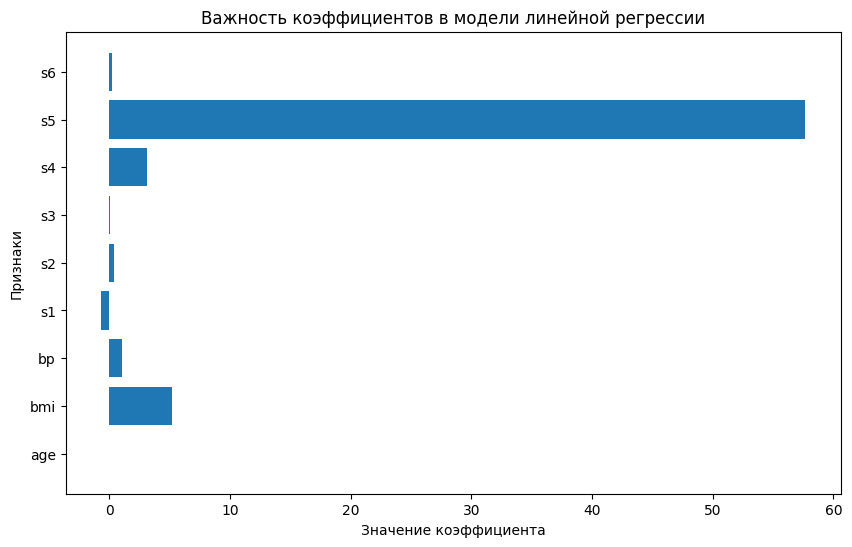

In [ ]:
plot_linear_regression_coef(regressor, df_no_outlier.drop('target', axis=1))

### Пару слов про масштабирование признаков

Стандартизация (z-преобразование) и Min-Max масштабирование - это два распространенных метода предобработки данных, которые используются для масштабирования признаков в машинном обучении.

**Модели, которые требуют масштабирование**

1. **Логистическая регрессия**

Логистическая регрессия оптимизируется с использованием градиентного спуска, который обновляет веса признаков на каждом шаге. Если признаки имеют разные масштабы, то шаги градиентного спуска по разным признакам могут быть разной величины, что может замедлить сходимость или сделать ее менее стабильной.

Веса признаков: В логистической регрессии веса признаков определяют вклад каждого признака в предсказание класса. Если признаки не отмасштабированы, то интерпретация весов становится затруднительной, так как веса будут зависеть от масштабов признаков.


2. **Метод k-ближайших соседей (K-Nearest Neighbors, KNN):**

Почему: KNN классифицирует объекты на основе их близости к другим объектам в пространстве признаков. Если признаки имеют разные шкалы и диапазоны значений, это может привести к тому, что одни признаки будут иметь больший вес при расчете расстояний, чем другие. Это может исказить результаты и сделать KNN неэффективным.


3. **Метод опорных векторов (Support Vector Machines, SVM):**

Почему: SVM пытается найти гиперплоскость, которая наилучшим образом разделяет данные на классы. Если признаки не отмасштабированы, то SVM может иметь трудности с правильным поиском этой гиперплоскости.

4. **Метод градиентного спуска:**

Почему: Многие алгоритмы машинного обучения, основанные на градиентном спуске (например, линейная регрессия, логистическая регрессия, нейронные сети), могут сходиться быстрее и стабильнее, если признаки отмасштабированы.



#### Какие свойства добавляет стандартизация

0. **Среднее значение равно 0**: Стандартизированные признаки имеют среднее значение (среднее) близкое к 0. Это означает, что средний "вклад" каждого признака в предсказание также близок к нулю.


1. **Стандартное отклонение равно 1**: Стандартизированные признаки имеют стандартное отклонение равное 1. Это гарантирует, что значения признаков лежат в одном и том же диапазоне и не имеют разных порядков величин.


2. **Улучшение сходимости модели**: Стандартизация может улучшить сходимость (скорость обучения) модели, особенно для алгоритмов, которые используют градиентный спуск для оптимизации, таких как линейная регрессия или метод опорных векторов (SVM). Это происходит потому, что масштабированные признаки позволяют алгоритму более быстро сойтись к оптимальным весам.


3. **Подходит для алгоритмов, чувствительных к масштабу**: Стандартизация особенно полезна для алгоритмов, которые чувствительны к масштабу признаков, например, метод ближайших соседей (k-NN) или метод главных компонент (PCA). Это помогает избежать доминирования признаков с большими значениями над другими.


4. **Интерпретация весов**: После стандартизации веса модели становятся интерпретируемыми. Вы можете сказать, что увеличение признака на одно стандартное отклонение будет приводить к изменению предсказания на величину, равную весу этого признака.

In [ ]:
df_standarted = make_standard_df(df_no_outlier)
regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = make_model(df_standarted, LinearRegression())

print(regressor.coef_)

MAE (Обучающая выборка): 45.98803951620611
MAE (Тестовая выборка): 41.59885734011208
R^2 (Обучающая выборка): 0.4179191480029585
R^2 (Тестовая выборка): 0.5008865787267961
MAPE (Обучающая выборка): 43.03003417785477
MAPE (Тестовая выборка): 35.07911968551662
[ -0.12304723  21.34043476  13.89620026 -22.17153575  11.92808995
   1.1104769    3.50953934  27.30236687   2.09591832]


<Axes: >

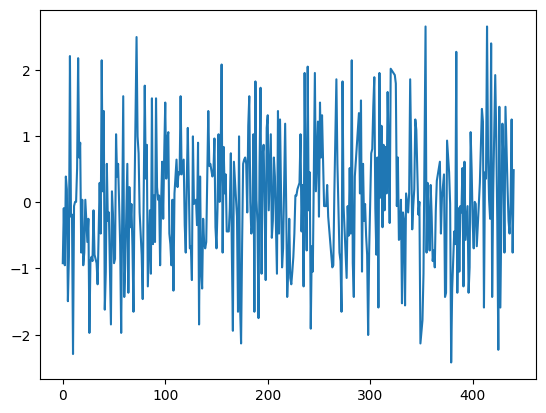

In [219]:
df_standarted.s1.plot()

## Коэфициенты влияния (линейная регерссия)

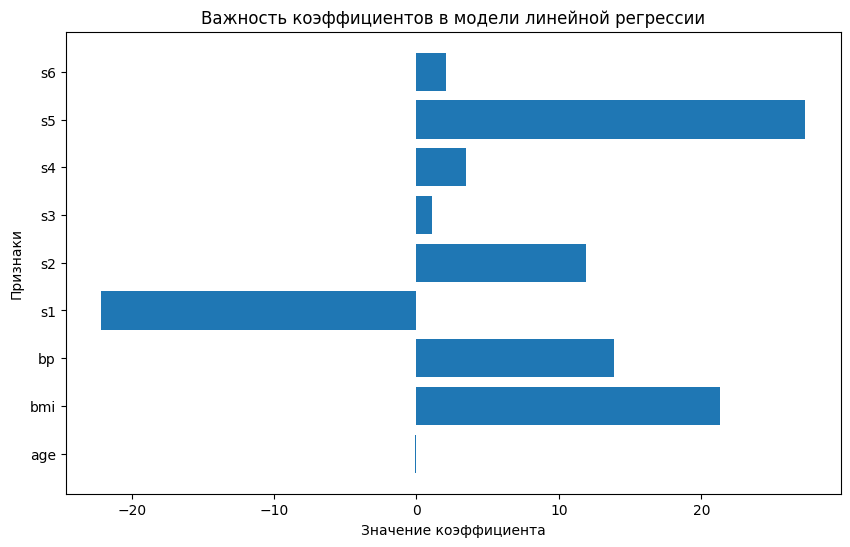

In [ ]:
plot_linear_regression_coef(regressor, df_no_outlier.drop('target', axis=1))

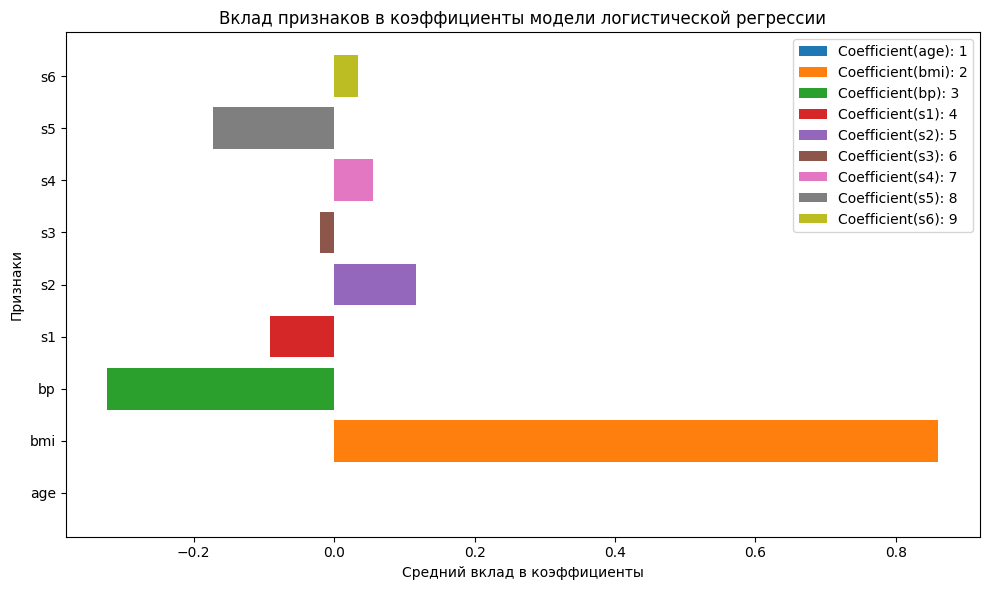

In [ ]:
visualize_coefficient_contributions(regressor, X_train, df_standarted.columns)

## Сжатие пространства и что делать с мультиколлениарностью

In [ ]:
df_no_outlier.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.219941,0.336939,0.296014,0.267086,-0.078501,0.219705,0.277630,0.328156,0.188825
bmi,0.219941,1.000000,0.396072,0.271590,0.254990,-0.295835,0.354507,0.443739,0.360898,0.534224
bp,0.336939,0.396072,1.000000,0.269510,0.221412,-0.141978,0.245562,0.374249,0.376248,0.408786
s1,0.296014,0.271590,0.269510,1.000000,0.912383,0.067428,0.521148,0.481154,0.289563,0.199465
s2,0.267086,0.254990,0.221412,0.912383,1.000000,-0.195197,0.679737,0.313196,0.264036,0.159068
s3,-0.078501,-0.295835,-0.141978,0.067428,-0.195197,1.000000,-0.751614,-0.376658,-0.223025,-0.342022
s4,0.219705,0.354507,0.245562,0.521148,0.679737,-0.751614,1.000000,0.566994,0.328625,0.367905
s5,0.277630,0.443739,0.374249,0.481154,0.313196,-0.376658,0.566994,1.000000,0.418699,0.541424
s6,0.328156,0.360898,0.376248,0.289563,0.264036,-0.223025,0.328625,0.418699,1.000000,0.327386
target,0.188825,0.534224,0.408786,0.199465,0.159068,-0.342022,0.367905,0.541424,0.327386,1.000000


In [ ]:
df_umap = make_umap_df(df_standarted, components=5)
regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = make_model(df_umap, LinearRegression())

Сжатые признаки [[3.540321  4.470325  6.0583835 2.5035994 3.898916 ]
 [3.3145466 2.3819444 3.5010278 2.814984  2.4475617]
 [3.3640327 4.3343925 5.774143  2.4104755 3.66035  ]
 ...
 [4.596277  5.376338  4.7526197 4.300805  4.4014025]
 [3.1852438 4.2645216 5.2004466 2.4134178 3.5039287]
 [4.1328335 5.007495  5.2153454 4.5362062 3.900271 ]]
MAE (Обучающая выборка): 47.16842867032197
MAE (Тестовая выборка): 43.00824930091114
R^2 (Обучающая выборка): 0.397466101903867
R^2 (Тестовая выборка): 0.4230929778402299
MAPE (Обучающая выборка): 43.800432942305406
MAPE (Тестовая выборка): 34.79118418433403


In [ ]:
from sklearn.linear_model import Ridge
regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = make_model(df_standarted, Ridge(random_state=42))

MAE (Обучающая выборка): 45.99541038880743
MAE (Тестовая выборка): 41.58845198650565
R^2 (Обучающая выборка): 0.41779171466499543
R^2 (Тестовая выборка): 0.5011230671488114
MAPE (Обучающая выборка): 43.023163555073154
MAPE (Тестовая выборка): 35.06281228923461


In [ ]:
from sklearn.linear_model import Lasso
regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = make_model(df_standarted, Lasso(random_state=42))

MAE (Обучающая выборка): 46.20309171131909
MAE (Тестовая выборка): 41.963649825291505
R^2 (Обучающая выборка): 0.41640450406908014
R^2 (Тестовая выборка): 0.49907218377092555
MAPE (Обучающая выборка): 43.187406704050765
MAPE (Тестовая выборка): 35.48954511799579


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = make_model(df_no_outlier, RandomForestRegressor(max_depth = 5, random_state = 42, criterion='absolute_error'))

columns = df_no_outlier.columns
feature_importances = regressor.feature_importances_
print()
for i, importnace in enumerate(feature_importances):
  print(columns[i], importnace)

MAE (Обучающая выборка): 33.32811501597444
MAE (Тестовая выборка): 43.46822784810128
R^2 (Обучающая выборка): 0.6920815732066754
R^2 (Тестовая выборка): 0.4286627862486114
MAPE (Обучающая выборка): 30.178063959967194
MAPE (Тестовая выборка): 33.94619951743202
age 0.06709035156304911
bmi 0.3072768477858155
bp 0.1505806938035381
s1 0.05288473535707106
s2 0.0435949150562705
s3 0.06354891686861748
s4 0.02402381067844219
s5 0.22326681313263727
s6 0.06773291575455896


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = make_model(df_standarted, RandomForestRegressor(max_depth = 5, random_state = 42, criterion='absolute_error'))

columns = df_no_outlier.columns
feature_importances = regressor.feature_importances_
print()
for i, importnace in enumerate(feature_importances):
  print(columns[i], importnace)

MAE (Обучающая выборка): 33.34752396166134
MAE (Тестовая выборка): 43.45848101265823
R^2 (Обучающая выборка): 0.6916824927228102
R^2 (Тестовая выборка): 0.42795845498061125
MAPE (Обучающая выборка): 30.221267347057402
MAPE (Тестовая выборка): 33.955884027834095

age 0.06709035156304911
bmi 0.3072768477858155
bp 0.1505806938035381
s1 0.05288473535707106
s2 0.0435949150562705
s3 0.06354891686861748
s4 0.02402381067844219
s5 0.22326681313263727
s6 0.06773291575455896
